In [259]:
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
from tueplots import bundles
plt.rcParams.update(bundles.icml2024())
from importlib import reload
import os 
#os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin' #For MacOS

from gradient_approximation import *
from optimizers import *
from sets import *
from utils import *
from run_experiments import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## None-stochastic FW LogReg on Simplex

In [14]:
func_name = "mushrooms"
d = 112
seed = 42
sigma = 0
sett = Simplex()
L = 5.25

args = init_experiment(func_name, d)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [15]:
def learning_rate(k):
    return 1 / L

In [16]:
TrueGradient = TrueGradientApproximator(func_name, args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**3)
GD.optimize()

100%|██████████████████████████████████████| 1000/1000 [00:02<00:00, 374.44it/s]


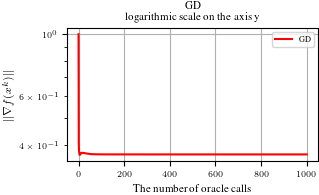

0.4968661761047623


In [17]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [30]:
def learning_rate_jaguar(k):
    return 1 / (k + L)

def learning_rate_lame(k):
    return (5 * np.sqrt(k) + 1) / (2 * k + L)

def learning_rate_turtle(k):
    return (2 * np.sqrt(k) + 1) / (k + L)

In [31]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [34]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=10**4)
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 89/89 [03:47<00:00,  2.56s/it]


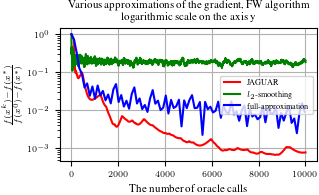

In [35]:
make_err_plot(optimizers_list, save_name="Non_stochastics_FW_LogReg_Simplex")

## None-stochastic FW Reg on Simplex

In [36]:
func_name = "quadratic"
d = 112
seed = 42
sigma = 0
sett = Simplex()
L = 1000
mu = 1

args = init_experiment(func_name, d, L=L, mu=mu)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [37]:
def learning_rate(k):
    return 1 / L

In [38]:
TrueGradient = TrueGradientApproximator(func_name, args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**5)
GD.optimize()

100%|█████████████████████████████████| 100000/100000 [00:12<00:00, 8144.79it/s]


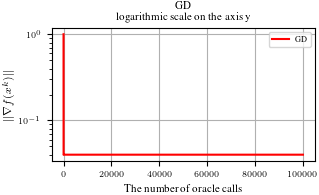

0.12914060691252388


In [39]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [240]:
def learning_rate_jaguar(k):
    return 1 / (k + 500)

def learning_rate_lame(k):
    return 10 / (k + L)

def learning_rate_turtle(k):
    return 30 / (k + 500)

In [241]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [244]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=10**5)
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████| 892/892 [00:36<00:00, 24.32it/s]


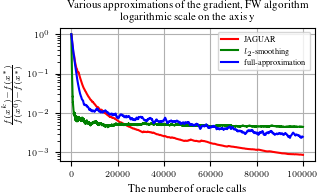

In [245]:
make_err_plot(optimizers_list, save_name="Non_stochastics_FW_Reg_Simplex")

## None-stochastic GD Reg on Simplex

In [319]:
func_name = "quadratic"
d = 112
seed = 101
sigma = 0
sett = Simplex()
L = 1000
mu = 1

args = init_experiment(func_name, d, L=L, mu=mu)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [320]:
def learning_rate(k):
    return 1 / L

In [321]:
TrueGradient = TrueGradientApproximator(func_name, args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**5)
GD.optimize()

100%|█████████████████████████████████| 100000/100000 [00:18<00:00, 5513.15it/s]


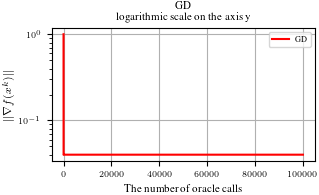

0.12914060691252388


In [322]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [432]:
def learning_rate_jaguar(k):
    return 1 / (k + 70000)

def learning_rate_lame(k):
    return 1 / (k + 20)

def learning_rate_turtle(k):
    return 1 / (k + L)

In [433]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [434]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = GDOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=10**4)
    opt.optimize()
    optimizers_list.append(opt)

 75%|███████████████████████████▋         | 3693/4945 [00:01<00:00, 2145.38it/s]


Precision 1e-06 achieved at step 3693!


 52%|██████████████████████▏                    | 46/89 [00:01<00:01, 24.66it/s]

Precision 1e-06 achieved at step 46!


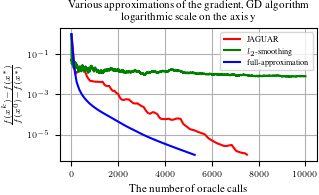

In [435]:
make_err_plot(optimizers_list, save_name="Non_stochastics_GD_Reg_Simplex")

## Stochastic OPF FW LogReg on Simplex

In [436]:
func_name = "mushrooms"
d = 112
seed = 42
sigma = 1
sett = Simplex()
L = 5.25

args = init_experiment(func_name, d)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [437]:
def learning_rate(k):
    return 1 / L

In [438]:
TrueGradient = TrueGradientApproximator(func_name, args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**3)
GD.optimize()

100%|██████████████████████████████████████| 1000/1000 [00:03<00:00, 263.41it/s]


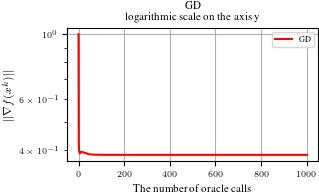

0.4968661761047623


In [439]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [469]:
def learning_rate_jaguar(k):
    return 1 / (k + 50)

def learning_rate_lame(k):
    return (np.sqrt(k) + 1) / (10 * k + 6)

def learning_rate_turtle(k):
    return (np.sqrt(k) + 1) / (2 * k + 6)

In [470]:
def momentum_k(k):
    return 0.9

In [471]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)

In [474]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=5 * 10**3)
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 44/44 [03:17<00:00,  4.49s/it]


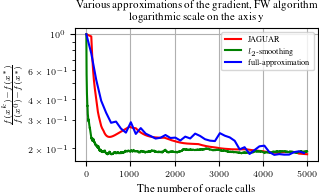

In [475]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_FW_LogReg_Simplex")

## Stochastic TPF FW LogReg on Simplex

In [476]:
func_name = "mushrooms"
d = 112
seed = 42
sigma = 1
sett = Simplex()
L = 5.25

args = init_experiment(func_name, d)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [477]:
def learning_rate(k):
    return 1 / L

In [478]:
TrueGradient = TrueGradientApproximator(func_name, args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**3)
GD.optimize()

100%|██████████████████████████████████████| 1000/1000 [00:03<00:00, 306.49it/s]


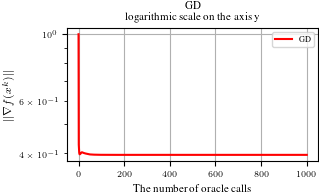

0.4968661761047623


In [479]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [490]:
def learning_rate_jaguar(k):
    return 1 / (k + 100)

def learning_rate_lame(k):
    return (np.sqrt(k) + 1) / (40 * k + 6)

def learning_rate_turtle(k):
    return (np.sqrt(k) + 1) / (2 * k + 6)

In [491]:
def momentum_k(k):
    return 0.9 * k / (k + 10)

In [492]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [495]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=5 * 10**3)
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 44/44 [01:53<00:00,  2.58s/it]


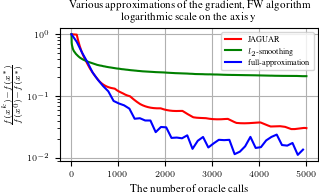

In [496]:
make_err_plot(optimizers_list, save_name="Stochastics_TPF_FW_LogReg_Simplex")

## Stochastic OPF-TPF FW LogReg on Simplex

In [505]:
func_name = "mushrooms"
d = 112
seed = 42
sigma = 1
sett = Simplex()
L = 5.25

args = init_experiment(func_name, d)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [506]:
TrueGradient = TrueGradientApproximator(func_name, args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**3)
GD.optimize()

100%|██████████████████████████████████████| 1000/1000 [00:03<00:00, 314.30it/s]


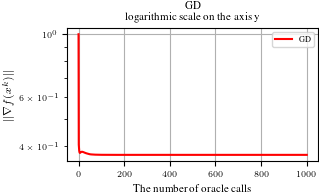

0.4968661761047624


In [507]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [508]:
def learning_rate_jaguar_opf(k):
    return 1 / (k + 50)

def learning_rate_jaguar_tpf(k):
    return 1 / (k + 100)

In [509]:
def momentum_k_opf(k):
    return 0.9

def momentum_k_tpf(k):
    return 0.9 * k / (k + 10)

In [510]:
oracle_opf = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)
oracle_tpf = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [511]:
Jaguar_opf = JaguarApproximator(oracle_opf, momentum_k=momentum_k_opf, gamma=1e-5)
Jaguar_tpf = JaguarApproximator(oracle_tpf, momentum_k=momentum_k_tpf, gamma=1e-5)

approx_list = [Jaguar_opf, Jaguar_tpf]
lr_list = [learning_rate_jaguar_opf, learning_rate_jaguar_tpf]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=5 * 10**3)
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████| 2445/2445 [01:04<00:00, 38.11it/s]


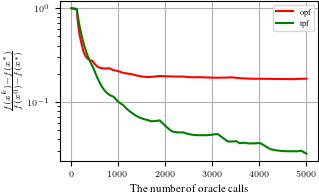

In [512]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_TPF_FW_LogReg_Simplex", labels=["opf", "tpf"])

## Stochastic OPF FW Reg on Simplex

In [513]:
func_name = "quadratic"
d = 112
seed = 101
sigma = 1
sett = Simplex()
L = 1000
mu = 1

args = init_experiment(func_name, d, L=L, mu=mu)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [514]:
def learning_rate(k):
    return 1 / L

In [515]:
TrueGradient = TrueGradientApproximator(func_name, args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**5)
GD.optimize()

100%|█████████████████████████████████| 100000/100000 [00:13<00:00, 7242.38it/s]


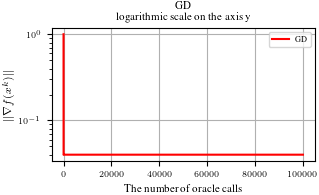

0.12914060691252388


In [516]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [649]:
def learning_rate_jaguar(k):
    return 1 / (0.3 * k + 1000)

def learning_rate_lame(k):
    return 1 / (3 * k + 6)

def learning_rate_turtle(k):
    return (np.sqrt(k) + 1) / (2 * k + 6)

In [650]:
def momentum_k(k):
    return 0.95 * k / (k + 10)

In [651]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)

In [654]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=10**5)
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████| 892/892 [01:06<00:00, 13.39it/s]


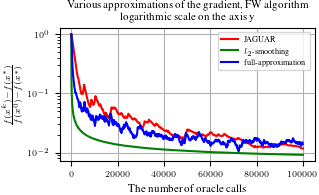

In [655]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_FW_Reg_Simplex")

## Stochastic TPF FW Reg on Simplex

In [656]:
func_name = "quadratic"
d = 112
seed = 101
sigma = 1
sett = Simplex()
L = 1000
mu = 1

args = init_experiment(func_name, d, L=L, mu=mu)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [657]:
def learning_rate(k):
    return 1 / L

In [658]:
TrueGradient = TrueGradientApproximator(func_name, args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**5)
GD.optimize()

100%|█████████████████████████████████| 100000/100000 [00:13<00:00, 7284.11it/s]


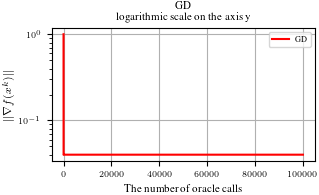

0.12914060691252388


In [659]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [684]:
def learning_rate_jaguar(k):
    return 1 / (0.3 * k + 400)

def learning_rate_lame(k):
    return 1 / (3 * k + 6)

def learning_rate_turtle(k):
    return (np.sqrt(k) + 1) / (2 * k + 6)

In [685]:
def momentum_k(k):
    return 0.95 * k / (k + 10)

In [686]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [689]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=10**5)
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████| 892/892 [00:39<00:00, 22.74it/s]


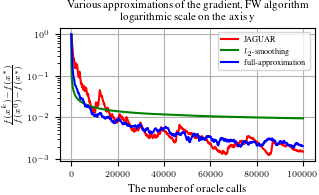

In [690]:
make_err_plot(optimizers_list, save_name="Stochastics_TPF_FW_Reg_Simplex")

## Stochastic OPF-TPF FW Reg on Simplex

In [692]:
func_name = "quadratic"
d = 112
seed = 101
sigma = 1
sett = Simplex()
L = 1000
mu = 1

args = init_experiment(func_name, d, L=L, mu=mu)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [693]:
def learning_rate(k):
    return 1 / L

In [697]:
TrueGradient = TrueGradientApproximator(func_name, args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**5)
GD.optimize()

100%|█████████████████████████████████| 100000/100000 [00:16<00:00, 5946.72it/s]


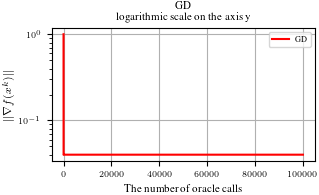

0.12914060691252388


In [698]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [699]:
def learning_rate_jaguar_opf(k):
    return 1 / (0.3 * k + 1000)

def learning_rate_jaguar_tpf(k):
    return 1 / (0.3 * k + 400)

In [700]:
def momentum_k_opf(k):
    return 0.95 * k / (k + 10)

def momentum_k_tpf(k):
    return 0.95 * k / (k + 10)

In [701]:
oracle_opf = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)
oracle_tpf = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [702]:
Jaguar_opf = JaguarApproximator(oracle_opf, momentum_k=momentum_k_opf, gamma=1e-5)
Jaguar_tpf = JaguarApproximator(oracle_tpf, momentum_k=momentum_k_tpf, gamma=1e-5)

approx_list = [Jaguar_opf, Jaguar_tpf]
lr_list = [learning_rate_jaguar_opf, learning_rate_jaguar_tpf]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=10**5)
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████| 49945/49945 [00:24<00:00, 2040.00it/s]


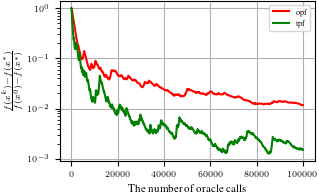

In [703]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_TPF_FW_Reg_Simplex", labels=["opf", "tpf"])